# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree #Função para plotar a árvore de decisão (desenhar).
from sklearn.tree import DecisionTreeClassifier #Usado para definir uma árvore de classificação.

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Mod6-df_encoded.csv")

In [3]:
df #Notei o surgimento de uma coluna estranha 'Unnamed'. Vou removê-la para não interferir na geração do modelo.

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,1,0,54.109589,9.884932,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,16646,1,0,1,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.dtypes #Verificando os tipos de dados. Precisarei converter os valores de mau de bool para int.

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64


In [6]:
df.isna().sum() #Verificando valores missings

sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

In [7]:
df.mau = df.mau.map({True: 1, False: 0}) #Convertendo a variável 'mau'

In [8]:
df.mau.dtypes #Verificando o tipo da variável 'mau'

dtype('int64')

In [9]:
y = df.mau #Variável Target (desejamos prever)

In [10]:
x = df.drop('mau',axis=1) #Variável explicativa (nos ajudará a prever)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100) #Separando dados de treino e teste
#cada variável criada acima armazenará seus respectivos treino e teste, com proporção de 70% e 30% respectivamente.

In [30]:
y_train.value_counts()

0    11392
1      263
Name: mau, dtype: int64

In [31]:
x_train.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia',
       'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [14]:
# 1
clf = DecisionTreeClassifier(random_state=100) #Definindo uma árvore de decisão.
# 2
clf = clf.fit(x_train, y_train) #Treinando a árvore/modelo de decisão com os dados de treino.

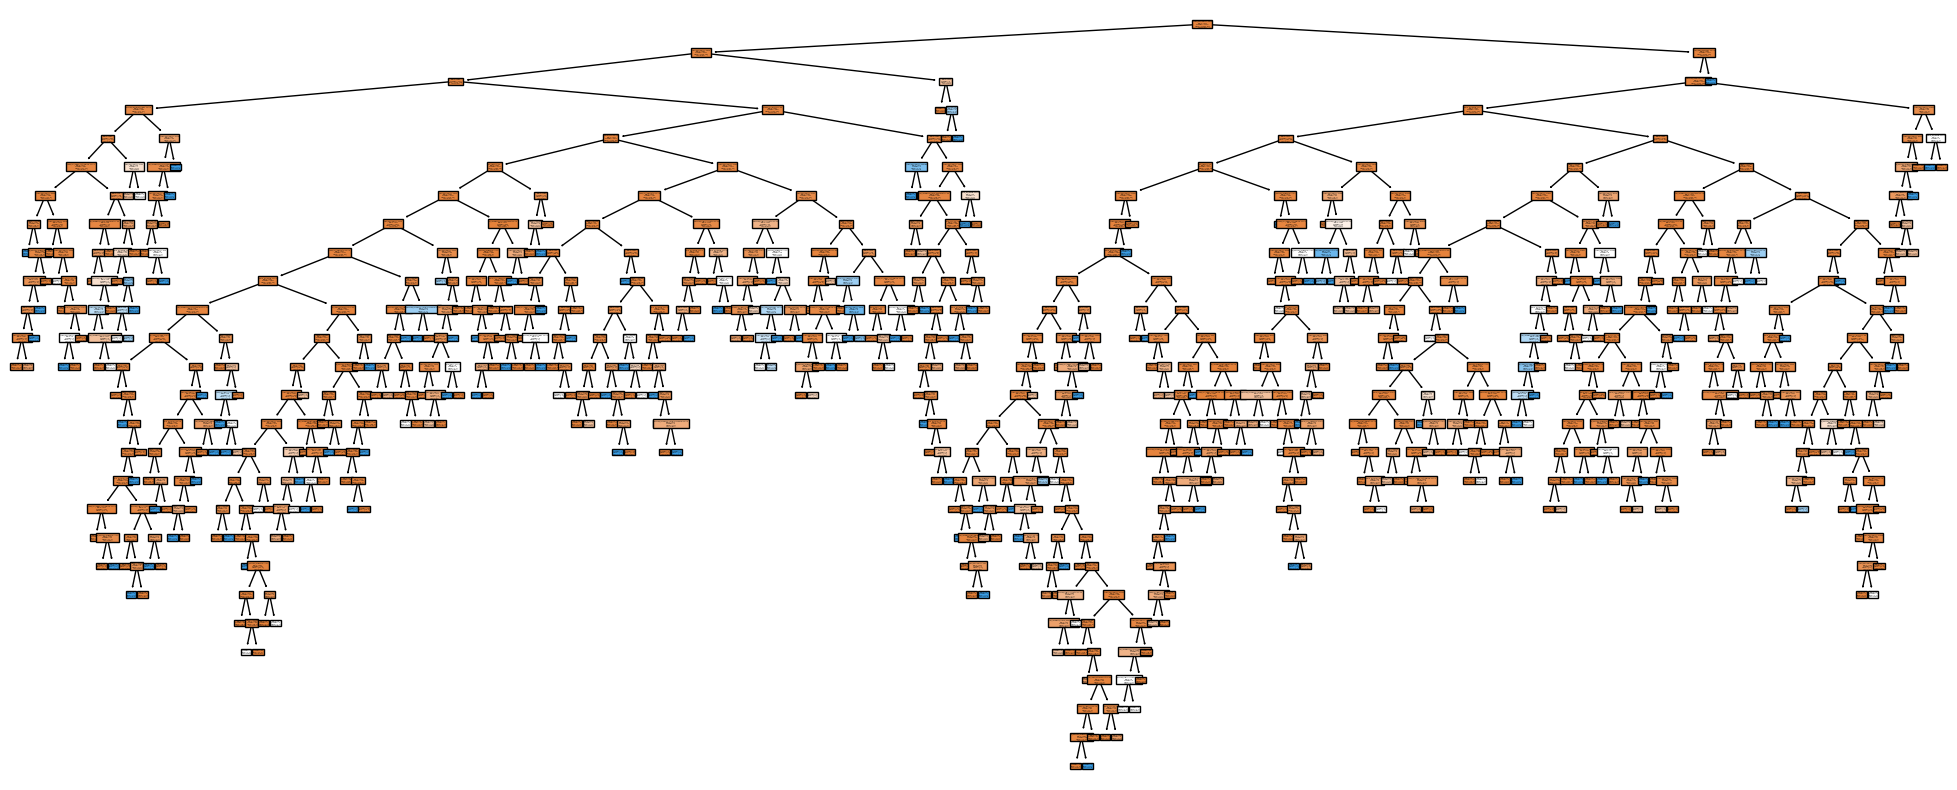

In [15]:
# 3
plt.figure(figsize=(25, 10)) #Desenhando Árvore 
plot_tree(clf, 
         filled=True, 
         class_names=['Mau', 'Bom'],
         feature_names=x_test.columns);

In [16]:
predicao_train = clf.predict(x_train) #Esta variável armazena o resultado ('mau') da árvore de decisão com base nas variáveis de teste.
predicao_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Anotações para estudos
O método 'predict' percore todos os dados de 'x_test', armazenando o resultado das previsões ('mau') feitas em cima das mesmas informações utilizadas para criá-lo. Permitindo que logo mais possamos avaliar o quão preciso é o modelo através das informações do Target.
Contudo, devemos observar que mesmo o modelo alcançando um nível alto de acertividade nesse tipo de teste, por enquanto só sabemos que ele funciona bem com os dados que ele já estudou (Overfitted). Não nos dando garantia de que ele funcionará bem para prever o que precisamos.
Modelos que não funcionam para previsões são chamados de Overfittados, pois não são generalistas.

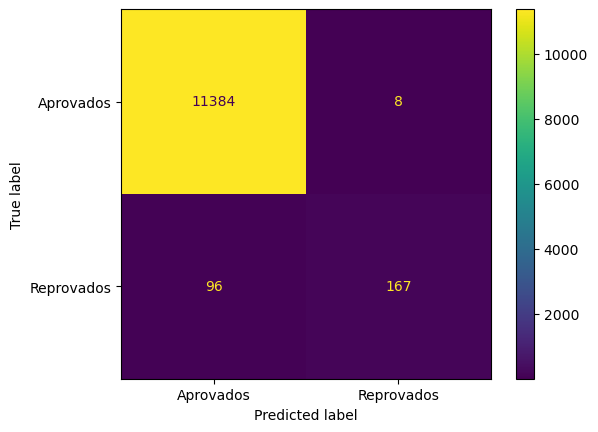

In [17]:
# 4
cm = confusion_matrix(y_train, predicao_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [18]:
# 5
accuracy_score(y_train, predicao_train) #Verificando a precisão do modelo.

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [19]:
# 1
predicao_test = clf.predict(x_test) #Realizando uma predição com o modelo criado.

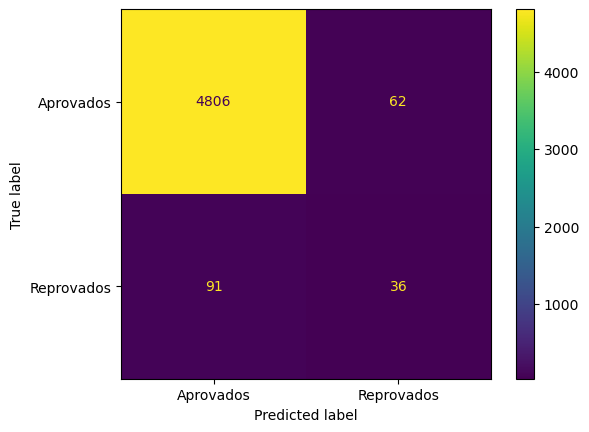

In [20]:
# 2
cm = confusion_matrix(y_test, predicao_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [21]:
# 3
accuracy_score(y_test, predicao_test) #Verificando a acurácia (quanto mais próximo de 1, mais preciso)

0.9693693693693693

Acurácia da base de treinamento: 0.991076791076791
Acurácia da base de teste: 0.9693693693693693

Podemos notar uma pequena queda de acurácia, porém ela ainda se encontra em um nível satisfatório.

In [22]:
# 4
clf_2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123) #Criando uma árvore de decisão e definindo
#a profundidade e o mínimo de amostras por folha.
clf_2 = clf_2.fit(x_train, y_train) #Treinando árvore.

In [23]:
predicao_train_2 = clf_2.predict(x_test)

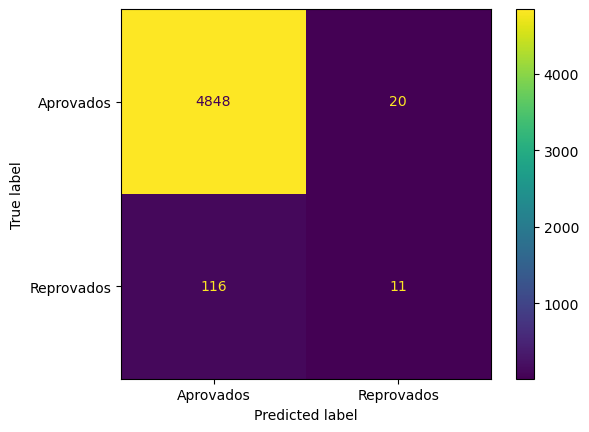

In [24]:
cm = confusion_matrix(y_test, predicao_train_2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

Segundo o modelo de treinamento, 31 pessoas foram classificadas como maus, cerca de 0,62%.

In [34]:
# 5
bons = y_train.map({0 : 0, 1 : 0}) #Como a coluna define os 'maus' (1), então os bons serão (0)
bons.value_counts()

0    11655
Name: mau, dtype: int64

In [35]:
accuracy_score(bons, predicao_train)

0.984984984984985

Classificando todos como 'bons' a acurácia do modelo permanece alta.